Brown Dwarf Inclination - Variability Model
Daniel Apai, August 20, 2024

In [1]:
import numpy as np
import astropy 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
def variability_amplitude(n, A_short,A_long, lattitudes, inclination):
    Asum_short = 0.
    Asum_long = 0.
    
    for i in range(n):
        #print(inclination - lattitudes[i])
        Asum_short = Asum_short+ A_short[i]*(np.cos(np.radians(inclination-(90.-lattitudes[i]))))**2
        Asum_long = Asum_long+ A_long[i]*(np.cos(np.radians(inclination-(90.-lattitudes[i]))))**2
    # print(inclination, Asum_short, Asum_long)
    return (Asum_short,Asum_long);
    

In [3]:
n = 6

# A_short = np.array([0.02,0.07,0.07, 0.07,0.07, 0.02])
# A_long = np.array([0.09,0.01,0.01, 0.01, 0.01, 0.09])
# lattitudes = np.array([80.,30.,10.,-10,-30,-80. ])

A_short = np.array([0.01, 0.03, 0.07, 0.07, 0.03, 0.01])
A_long  = np.array([0.09, 0.03, 0.01, 0.01, 0.03, 0.09])
lattitudes = np.array([80.,30.,10.,-10,-30,-80. ])

A_short2 = np.array([0.01, 0.06, 0.09, 0.09, 0.06, 0.01])
A_long2  = np.array([0.01, 0.03, 0.09, 0.09, 0.03, 0.01])

Text(2, 0.05, 'Polar View')

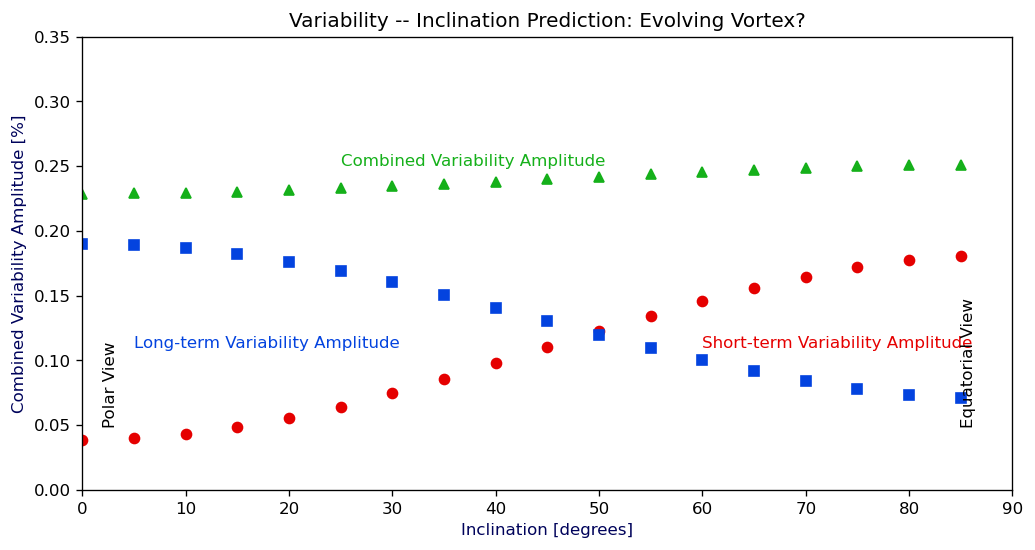

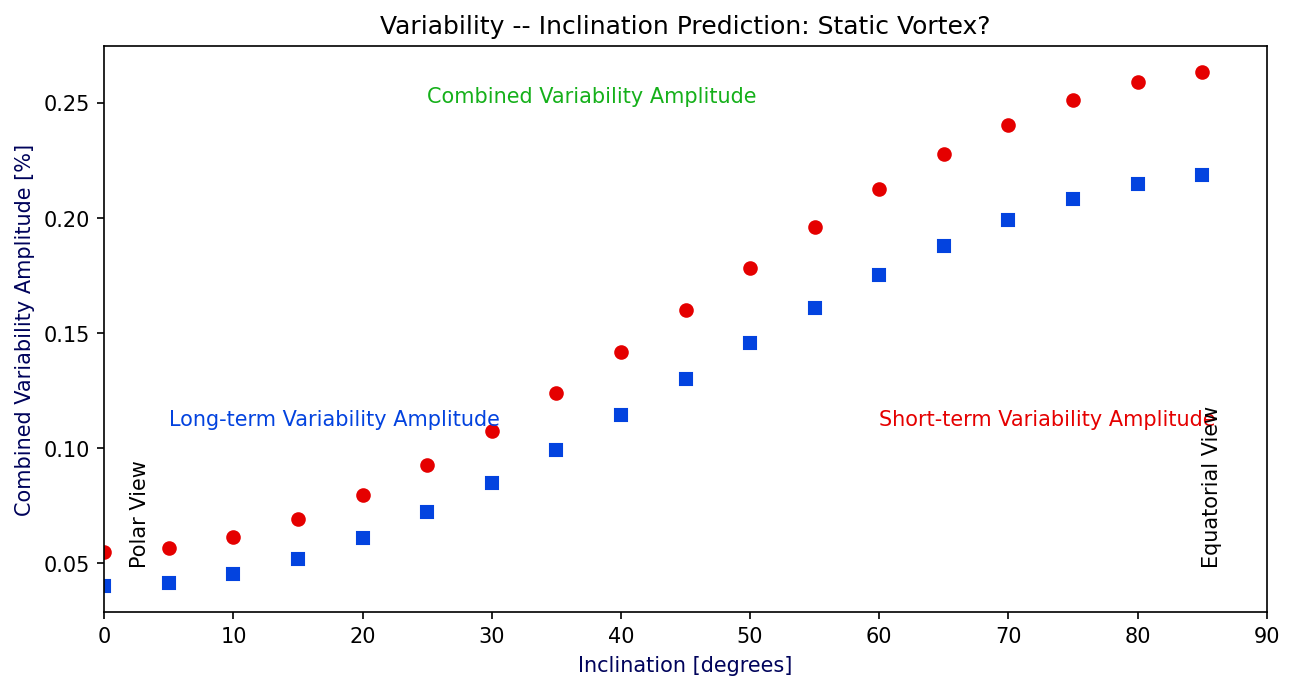

In [4]:
fig = plt.figure(figsize=(10, 5), dpi=120)
ax=plt.gca()
ax.set_xlim([0,90.])
ax.set_ylim([0,0.35])
plt.xlabel('Inclination [degrees]',color='xkcd:dark blue',fontsize=10)
plt.ylabel('Combined Variability Amplitude [%]',color='xkcd:dark blue',fontsize=10)
plt.title("Variability -- Inclination Prediction: Evolving Vortex?")

for inclination in np.arange(0,90,5):
    calc_amp = variability_amplitude(n, A_short, A_long, lattitudes, inclination)
    plt.plot(inclination,calc_amp[0],'o',color='xkcd:red',markersize=6)
    plt.plot(inclination,calc_amp[1],'s',color='xkcd:blue',markersize=6)
    plt.plot(inclination, calc_amp[0] + calc_amp[1],'^', color='xkcd:green',markersize=6)

plt.text(60,0.11,'Short-term Variability Amplitude', color='xkcd:red')
plt.text(5,0.11,'Long-term Variability Amplitude', color='xkcd:blue')
plt.text(25,0.25,'Combined Variability Amplitude', color='xkcd:green')
    
plt.text(85,0.05,'Equatorial View', rotation='vertical')
plt.text(2,0.05,'Polar View', rotation='vertical')

#### ==================================================================

fig = plt.figure(figsize=(10, 5), dpi=150)
ax=plt.gca()
ax.set_xlim([0,90.])
# ax.set_ylim([0,0.35])
plt.xlabel('Inclination [degrees]',color='xkcd:dark blue',fontsize=10)
plt.ylabel('Combined Variability Amplitude [%]',color='xkcd:dark blue',fontsize=10)
plt.title("Variability -- Inclination Prediction: Static Vortex?")

for inclination in np.arange(0,90,5):
    calc_amp = variability_amplitude(n, A_short2, A_long2, lattitudes, inclination)
    plt.plot(inclination,calc_amp[0],'o',color='xkcd:red',markersize=6)
    plt.plot(inclination,calc_amp[1],'s',color='xkcd:blue',markersize=6)
    # plt.plot(inclination, calc_amp[0] + calc_amp[1],'^', color='xkcd:green',markersize=6)

plt.text(60,0.11,'Short-term Variability Amplitude', color='xkcd:red')
plt.text(5,0.11,'Long-term Variability Amplitude', color='xkcd:blue')
plt.text(25,0.25,'Combined Variability Amplitude', color='xkcd:green')
    
plt.text(85,0.05,'Equatorial View', rotation='vertical')
plt.text(2,0.05,'Polar View', rotation='vertical')


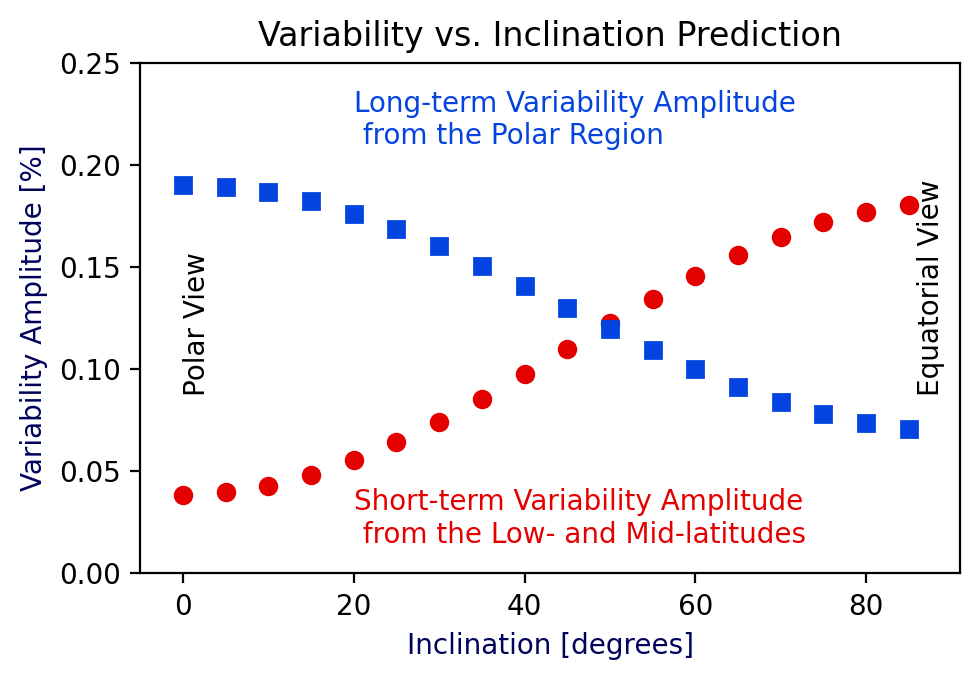

In [6]:
plotPath = '/Users/nguyendat/Documents/GitHub/polar_vortice/PolarVortice/AtmopsherePlotterOutputPlots/'
save = True
# save = False 

fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax=plt.gca()
ax.set_xlim([-5,91.])
ax.set_ylim([0,0.25])
plt.xlabel('Inclination [degrees]',color='xkcd:dark blue',fontsize=10)
plt.ylabel('Variability Amplitude [%]',color='xkcd:dark blue',fontsize=10)
plt.title("Variability vs. Inclination Prediction")

for inclination in np.arange(0,90,5):
    calc_amp = variability_amplitude(n, A_short, A_long, lattitudes, inclination)
    plt.plot(inclination,calc_amp[0],'o',color='xkcd:red',markersize=6)
    plt.plot(inclination,calc_amp[1],'s',color='xkcd:blue',markersize=6)

plt.text(20,0.015,'Short-term Variability Amplitude \n from the Low- and Mid-latitudes', color='xkcd:red')
plt.text(20,0.21,'Long-term Variability Amplitude \n from the Polar Region', color='xkcd:blue')
    
plt.text(86,0.09,'Equatorial View', rotation='vertical')
plt.text(0,0.09,'Polar View', rotation='vertical')

plt.tight_layout()

if save:
    plotOut = plotPath + '/analytical_variabilityInclinationTrend'
    plt.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    plt.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')